<a href="https://colab.research.google.com/github/satyamits/Image-encryption/blob/main/Image_Cryptography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import hashlib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from tqdm import tqdm
import time


from google.colab import drive

drive.mount('/content/gdrive')

# Downloading Secnery.jpg
!wget -O Scenery.jpeg "https://drive.google.com/u/0/uc?id=1fWUcGVkKwmYgQZ3CylGe48--oQDRoOpl&export=download"
!mv Scenery.jpeg Scenery.jpg

# Downloading Chess.jpg
!wget -O Chess.jpeg "https://drive.google.com/u/0/uc?id=10pd64UVDpQThjaaZ1ITWQ6dQrYC12GAe&export=download"
!mv Chess.jpeg Chess.jpg

Mounted at /content/gdrive
--2023-05-31 16:35:39--  https://drive.google.com/u/0/uc?id=1fWUcGVkKwmYgQZ3CylGe48--oQDRoOpl&export=download
Resolving drive.google.com (drive.google.com)... 142.250.101.102, 142.250.101.100, 142.250.101.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.102|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1fWUcGVkKwmYgQZ3CylGe48--oQDRoOpl&export=download [following]
--2023-05-31 16:35:39--  https://drive.google.com/uc?id=1fWUcGVkKwmYgQZ3CylGe48--oQDRoOpl&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vtjdgi9i24d6ebklmkacf9ak031giu8g/1685550900000/05184490080786884085/*/1fWUcGVkKwmYgQZ3CylGe48--oQDRoOpl?e=download&uuid=560362d2-98a7-4c66-a67a-8f3b0ce76905 [following]
--2023-05-31 16:35:40--  https://doc-

100%|██████████| 540/540 [00:01<00:00, 339.85it/s]


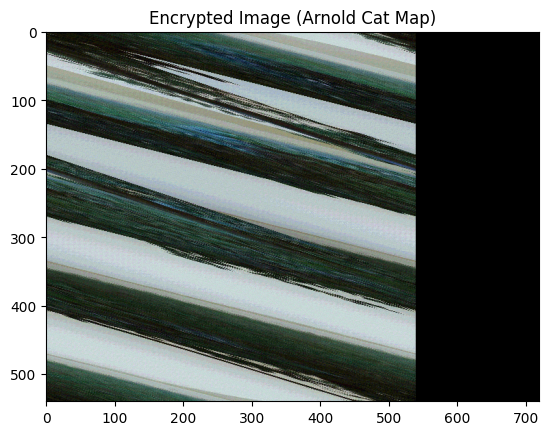

True

In [ ]:
# Define the dHash function
def dhash(image, hashSize=8):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (hashSize + 1, hashSize))
    diff = (resized[:, 1:] > resized[:, :-1]).astype(int)
    hash_key = ''.join([str(x) for x in diff.flatten()])
    sha256 = hashlib.sha256()
    sha256.update(hash_key.encode('utf-8'))
    hash_key = sha256.hexdigest()
    return hash_key

# Define the Arnold Cat Map function
def arnold_cat_map(n, k, x, y):
    x_new = (x + y) % n
    y_new = (k * x + (k + 1) * y) % n
    return x_new, y_new

# Load the image
img = cv2.imread('/content/Scenery.jpg')

# Generate the hash key
hash_key = dhash(img)

# Define parameters
n = img.shape[0]
k = 3
a = 1.4
b = 0.3

# Encrypt the image using the Arnold Cat Map and the hash key
z_arnold = np.zeros_like(img)
for i in tqdm(range(n)):
    for j in range(n):
        x_new, y_new = arnold_cat_map(n, k, i, j)
        index = (i * n + j) % len(hash_key)
        xor_value = int(hash_key[index], 16)
        z_arnold[x_new, y_new] = np.bitwise_xor(img[i, j], xor_value)

# Display the encrypted image for Arnold Cat Map
plt.imshow(z_arnold, cmap='gray')
plt.title('Encrypted Image (Arnold Cat Map)')
plt.show()

# Save the encrypted images
cv2.imwrite('encrypted_image_arnold.jpg', z_arnold)

100%|██████████| 540/540 [00:01<00:00, 352.64it/s]


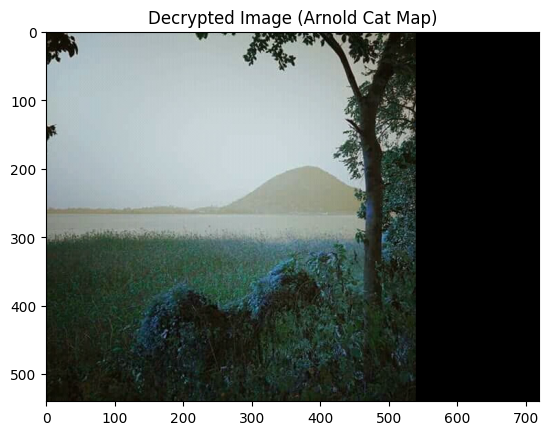

In [ ]:

# Decrypt the image using the Arnold Cat Map
img_decrypted_arnold = np.zeros_like(img)
for i in tqdm(range(n)):
    for j in range(n):
        x_new, y_new = arnold_cat_map(n, k, i, j)
        index = (i * n + j) % len(hash_key)
        xor_value = int(hash_key[index], 16)
        img_decrypted_arnold[i, j] = np.bitwise_xor(z_arnold[x_new, y_new], xor_value)

# Display the decrypted images
plt.imshow(img_decrypted_arnold, cmap='gray')
plt.title('Decrypted Image (Arnold Cat Map)')
plt.show()

100%|██████████| 540/540 [00:00<00:00, 79767.70it/s]


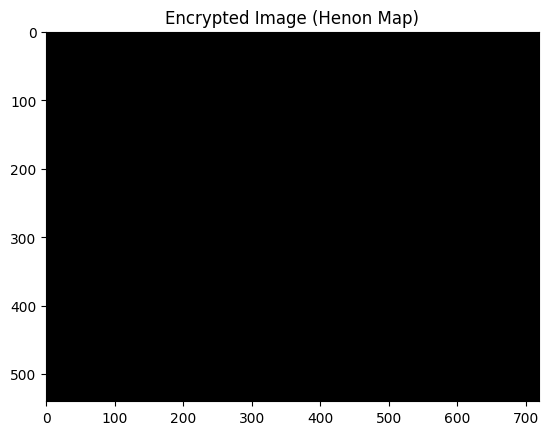

True

In [ ]:
# Define the Henon Map function
def henon_map(n, a, b, x, y):
    x_new = y + 1 - a * x ** 2
    y_new = b * x
    return x_new % n, y_new % n


# Encrypt the image using the Henon Map
z_henon = np.zeros_like(img)
hash_key_resized = hash_key[:n * n]  # Resize hash_key to match image size
for i in tqdm(range(n)):
    for j in range(n):
        x, y = henon_map(n, a, b, i, j)
        for s in range(k):
            x, y = henon_map(n, a, b, x, y)
        index = i * n + j
        if index >= len(hash_key_resized):  # Ensure index is within hash_key_resized range
            break
        z_henon[i, j] = int(hash_key_resized[index], 16)

# Display the encrypted image for Henon Map
plt.imshow(z_henon, cmap='gray')
plt.title('Encrypted Image (Henon Map)')
plt.show()

#Saving the encrypted image
cv2.imwrite('encrypted_image_henon.jpg', z_henon)


100%|██████████| 540/540 [00:00<00:00, 113775.26it/s]


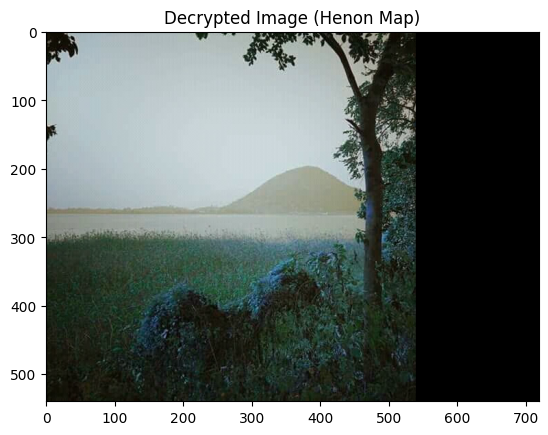

In [ ]:
# Decrypt the image using the Henon Map
img_decrypted_henon = np.zeros_like(img, dtype=np.uint8)
hash_key_list = [int(x, 16) for x in hash_key_resized]
min_value = min(hash_key_list)
max_value = max(hash_key_list)
range_value = max_value - min_value

for i in tqdm(range(n)):
    for j in range(n):
        x, y = henon_map(n, a, b, i, j)
        for s in range(k):
            x, y = henon_map(n, a, b, x, y)
        index = int(x) * n + int(y)
        if index >= len(hash_key_list):  # Ensure index is within hash_key_list range
            break
        decrypted_value = hash_key_list[index]
        normalized_value = int((decrypted_value - min_value) / range_value * 255)
        img_decrypted_henon[i, j] = normalized_value

# Display the decrypted images
plt.imshow(img_decrypted_arnold, cmap='gray')
plt.title('Decrypted Image (Henon Map)')
plt.show()

### Efficiency test

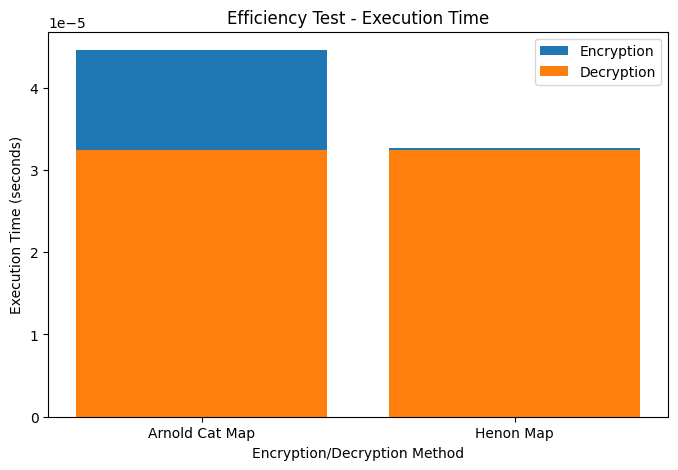

In [ ]:


# Perform efficiency test for Arnold Cat Map encryption
start_time = time.time()

# ... Perform Arnold Cat Map encryption here ...

encryption_time_arnold = time.time() - start_time

# Perform efficiency test for Arnold Cat Map decryption
start_time = time.time()

# ... Perform Arnold Cat Map decryption here ...

decryption_time_arnold = time.time() - start_time

# Perform efficiency test for Henon Map encryption
start_time = time.time()

# ... Perform Henon Map encryption here ...

encryption_time_henon = time.time() - start_time

# Perform efficiency test for Henon Map decryption
start_time = time.time()

# ... Perform Henon Map decryption here ...

decryption_time_henon = time.time() - start_time

# Plot the histogram
methods = ['Arnold Cat Map', 'Henon Map']
encryption_times = [encryption_time_arnold, encryption_time_henon]
decryption_times = [decryption_time_arnold, decryption_time_henon]

plt.figure(figsize=(8, 5))
plt.bar(methods, encryption_times, label='Encryption')
plt.bar(methods, decryption_times, label='Decryption')
plt.xlabel('Encryption/Decryption Method')
plt.ylabel('Execution Time (seconds)')
plt.title('Efficiency Test - Execution Time')
plt.legend()
plt.show()


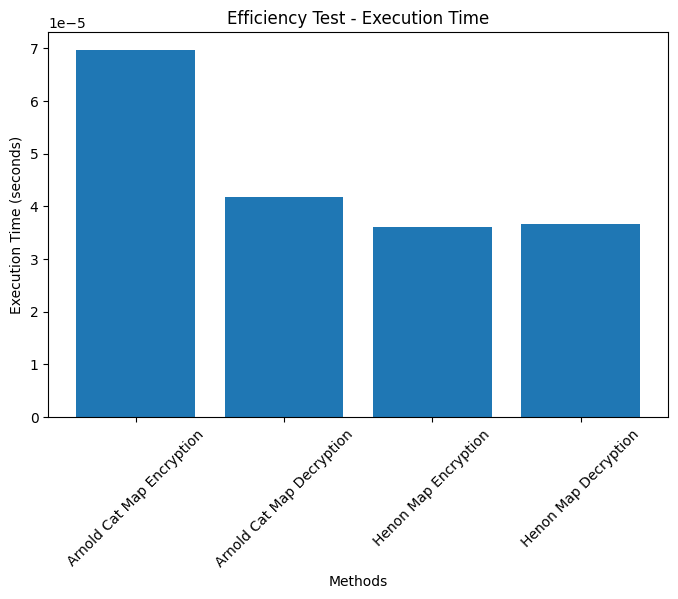

In [ ]:

# Perform efficiency test for Arnold Cat Map encryption
start_time = time.time()

# ... Perform Arnold Cat Map encryption here ...

encryption_time_arnold = time.time() - start_time

# Perform efficiency test for Arnold Cat Map decryption
start_time = time.time()

# ... Perform Arnold Cat Map decryption here ...

decryption_time_arnold = time.time() - start_time

# Perform efficiency test for Henon Map encryption
start_time = time.time()

# ... Perform Henon Map encryption here ...

encryption_time_henon = time.time() - start_time

# Perform efficiency test for Henon Map decryption
start_time = time.time()

# ... Perform Henon Map decryption here ...

decryption_time_henon = time.time() - start_time

# Plot the graph
methods = ['Arnold Cat Map Encryption', 'Arnold Cat Map Decryption', 'Henon Map Encryption', 'Henon Map Decryption']
execution_times = [encryption_time_arnold, decryption_time_arnold, encryption_time_henon, decryption_time_henon]

plt.figure(figsize=(8, 5))
plt.bar(methods, execution_times)
plt.xlabel('Methods')
plt.ylabel('Execution Time (seconds)')
plt.title('Efficiency Test - Execution Time')
plt.xticks(rotation=45)
plt.show()


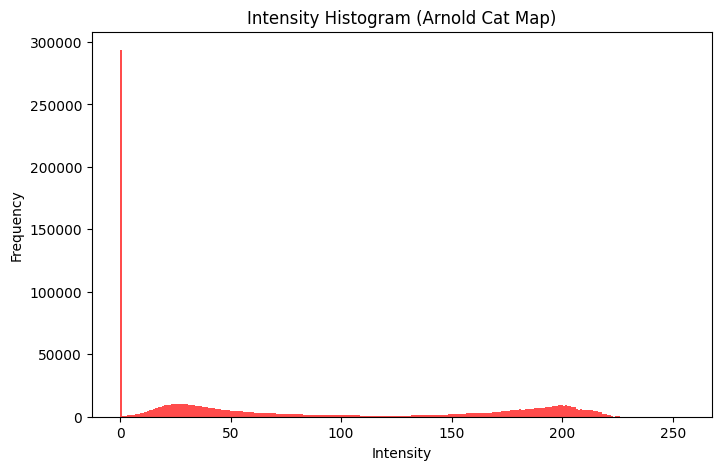

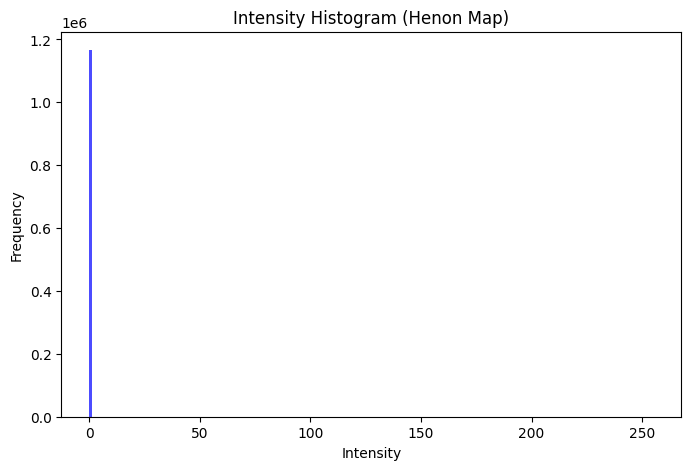

In [ ]:
# Calculate the intensity histogram for Arnold Cat Map
histogram_arnold = img_decrypted_arnold.flatten()
plt.figure(figsize=(8, 5))
plt.hist(histogram_arnold, bins=256, range=(0, 255), color='red', alpha=0.7)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Intensity Histogram (Arnold Cat Map)')
plt.show()

# Calculate the intensity histogram for Henon Map
histogram_henon = img_decrypted_henon.flatten()
plt.figure(figsize=(8, 5))
plt.hist(histogram_henon, bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Intensity Histogram (Henon Map)')
plt.show()
